# Data Preparation - LMA Features Data

### Note: Datasets follow the format preprocess_datasetname
So we have, for example: Fs_B_dataset1.csv -> Dataset was first Feature Selected and then Balanced

Fs - Feature Selected

B - Balanced

N - Normalized

S - Standardized

## Imports

In [69]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import joblib
from collections import Counter
import numpy as np

### Load Dataset

In [70]:
data = pd.read_csv('datasets/BANDAI_KIN_05sec.csv')

In [71]:
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,0.433596,0.158604,0.262368,0.538619,0.204290,0.286321,0.174445,0.107800,0.236151,0.223894,...,0.544719,0.747464,0.783573,2.388999,2.320488,1.089438,1.494928,0.05,-0.1,0.0
1,0.502380,0.348371,0.141433,0.355769,0.308451,0.226158,0.114087,0.185519,0.236151,0.223894,...,0.375438,0.813410,1.279194,1.685722,0.708942,0.661071,0.783065,0.05,-0.1,0.0
2,0.523859,0.430275,0.176769,0.588712,0.337860,0.209359,0.111133,0.249847,0.236151,0.223894,...,0.343913,0.897555,0.762036,0.337886,0.417700,0.325002,0.209341,0.05,-0.1,0.0
3,0.506404,0.372590,0.182689,0.671607,0.304908,0.199841,0.092428,0.244035,0.236151,0.223894,...,1.118295,0.912977,1.376315,0.773128,0.324001,1.594570,0.748233,0.05,-0.1,0.0
4,0.399879,0.189986,0.280258,0.595205,0.236768,0.250473,0.108253,0.145548,0.236151,0.223894,...,1.306542,0.828419,0.436481,0.562979,1.256880,0.433401,0.184292,0.05,-0.1,0.0


## Feature Selection

In [72]:
data = pd.read_csv('datasets/BANDAI_KIN_05sec.csv')

In [73]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,0.433596,0.158604,0.262368,0.538619,0.204290,0.286321,0.174445,0.107800,0.236151,0.223894,...,0.391787,1.194499,1.160244,0.544719,0.747464,0.783573,2.388999,2.320488,1.089438,1.494928
1,0.502380,0.348371,0.141433,0.355769,0.308451,0.226158,0.114087,0.185519,0.236151,0.223894,...,0.807009,1.046016,1.007270,0.375438,0.813410,1.279194,1.685722,0.708942,0.661071,0.783065
2,0.523859,0.430275,0.176769,0.588712,0.337860,0.209359,0.111133,0.249847,0.236151,0.223894,...,0.989961,0.908436,1.027262,0.343913,0.897555,0.762036,0.337886,0.417700,0.325002,0.209341
3,0.506404,0.372590,0.182689,0.671607,0.304908,0.199841,0.092428,0.244035,0.236151,0.223894,...,1.082582,0.689009,1.158406,1.118295,0.912977,1.376315,0.773128,0.324001,1.594570,0.748233
4,0.399879,0.189986,0.280258,0.595205,0.236768,0.250473,0.108253,0.145548,0.236151,0.223894,...,1.172738,0.480506,0.535663,1.306542,0.828419,0.436481,0.562979,1.256880,0.433401,0.184292


### Variance Analysis

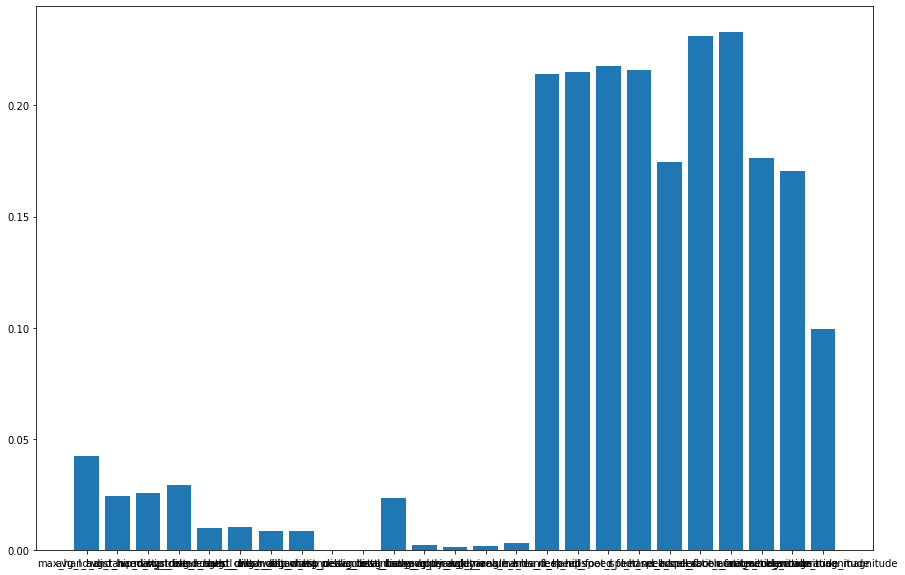

max_hand_distance  -  0.04228168764373475
avg_l_hand_hip_distance  -  0.02423701436728336
avg_r_hand_hip_distance  -  0.025552573700501464
max_stride_length  -  0.02901407754552197
avg_l_hand_chest_distance  -  0.009934495740628956
avg_r_hand_chest_distance  -  0.010219135714330365
avg_l_elbow_hip_distance  -  0.008450460050310922
avg_r_elbow_hip_distance  -  0.008523900105683132
avg_chest_pelvis_distance  -  5.585569485299485e-16
avg_neck_chest_distance  -  7.382038792866843e-16
avg_total_body_volume  -  0.023139229158241254
avg_lower_body_volume  -  0.0020468231564047317
avg_upper_body_volume  -  0.0012069677612653884
avg_triangle_area_hands_neck  -  0.0019123383365826842
avg_triangle_area_feet_hips  -  0.003043319284806088
l_hand_speed  -  0.21410585892887146
r_hand_speed  -  0.21495712673925604
l_foot_speed  -  0.21753766813606407
r_foot_speed  -  0.21591498505725448
neck_speed  -  0.17451516046040194
l_hand_acceleration_magnitude  -  0.2313326994956406
r_hand_acceleration_magnitud

In [74]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

### Remove highly correlated features

In [75]:
data = pd.read_csv('datasets/BANDAI_KIN_05sec.csv')

In [76]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,0.433596,0.158604,0.262368,0.538619,0.204290,0.286321,0.174445,0.107800,0.236151,0.223894,...,0.391787,1.194499,1.160244,0.544719,0.747464,0.783573,2.388999,2.320488,1.089438,1.494928
1,0.502380,0.348371,0.141433,0.355769,0.308451,0.226158,0.114087,0.185519,0.236151,0.223894,...,0.807009,1.046016,1.007270,0.375438,0.813410,1.279194,1.685722,0.708942,0.661071,0.783065
2,0.523859,0.430275,0.176769,0.588712,0.337860,0.209359,0.111133,0.249847,0.236151,0.223894,...,0.989961,0.908436,1.027262,0.343913,0.897555,0.762036,0.337886,0.417700,0.325002,0.209341
3,0.506404,0.372590,0.182689,0.671607,0.304908,0.199841,0.092428,0.244035,0.236151,0.223894,...,1.082582,0.689009,1.158406,1.118295,0.912977,1.376315,0.773128,0.324001,1.594570,0.748233
4,0.399879,0.189986,0.280258,0.595205,0.236768,0.250473,0.108253,0.145548,0.236151,0.223894,...,1.172738,0.480506,0.535663,1.306542,0.828419,0.436481,0.562979,1.256880,0.433401,0.184292


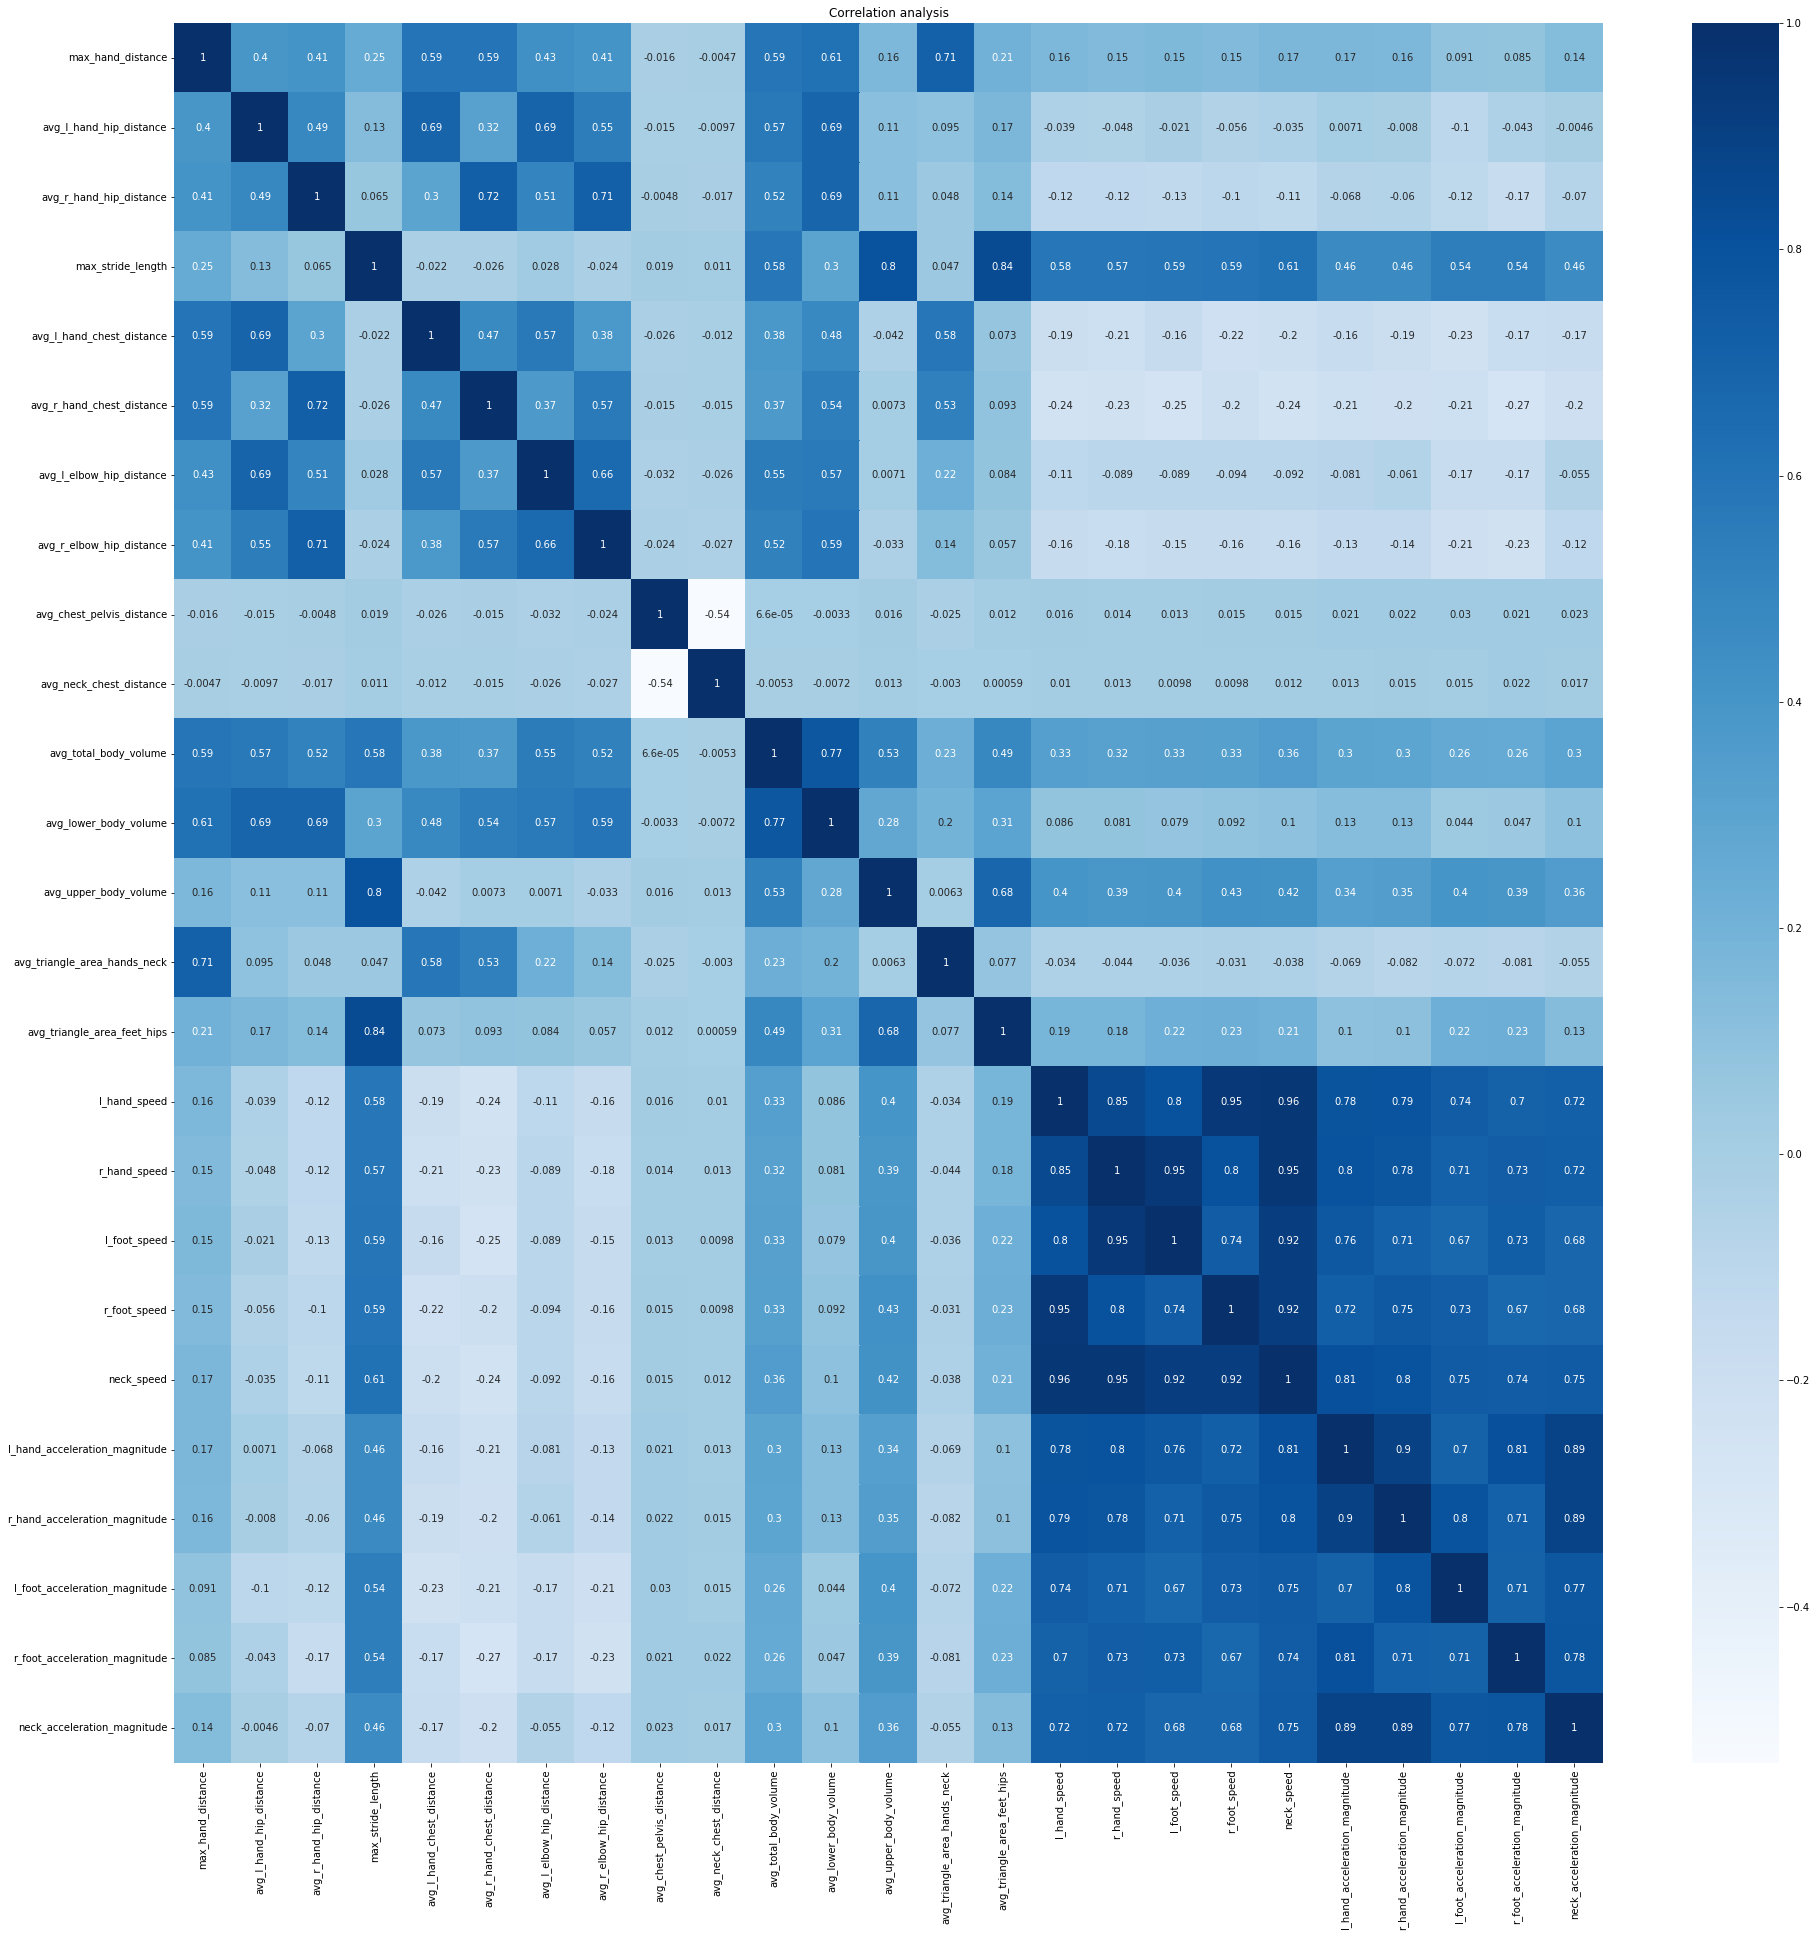

In [77]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [78]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['neck_speed']


In [79]:
df = pd.read_csv('datasets/BANDAI_KIN_05sec.csv')

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION_P"])
print("===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_A"])
print("\n===CORRELATION BETWEEN VAR AND AROUSAL COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_D"])
print("\n===CORRELATION BETWEEN VAR AND DOMINANCE COORDINATE===")
print(cor_target)

===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===
max_hand_distance                0.202808
avg_l_hand_hip_distance          0.027953
avg_r_hand_hip_distance          0.088358
max_stride_length                0.290533
avg_l_hand_chest_distance        0.019536
avg_r_hand_chest_distance        0.057522
avg_l_elbow_hip_distance         0.110227
avg_r_elbow_hip_distance         0.148545
avg_chest_pelvis_distance        0.022516
avg_neck_chest_distance          0.015557
avg_total_body_volume            0.172614
avg_lower_body_volume            0.077250
avg_upper_body_volume            0.155252
avg_triangle_area_hands_neck     0.126404
avg_triangle_area_feet_hips      0.092934
l_hand_speed                     0.417412
r_hand_speed                     0.414344
l_foot_speed                     0.394640
r_foot_speed                     0.395537
neck_speed                       0.429860
l_hand_acceleration_magnitude    0.396284
r_hand_acceleration_magnitude    0.382676
l_foot_acceleration_ma

## Outliers

In [80]:
from scipy import stats

In [81]:
data = pd.read_csv('datasets/BANDAI_KIN_05sec.csv')
print(data.shape)

(49773, 28)


In [82]:
data.iloc[0]

max_hand_distance                0.433596
avg_l_hand_hip_distance          0.158604
avg_r_hand_hip_distance          0.262368
max_stride_length                0.538619
avg_l_hand_chest_distance        0.204290
avg_r_hand_chest_distance        0.286321
avg_l_elbow_hip_distance         0.174445
avg_r_elbow_hip_distance         0.107800
avg_chest_pelvis_distance        0.236151
avg_neck_chest_distance          0.223894
avg_total_body_volume            0.214717
avg_lower_body_volume            0.062277
avg_upper_body_volume            0.093622
avg_triangle_area_hands_neck     0.065018
avg_triangle_area_feet_hips      0.144140
l_hand_speed                     0.391787
r_hand_speed                     1.194499
l_foot_speed                     1.160244
r_foot_speed                     0.544719
neck_speed                       0.747464
l_hand_acceleration_magnitude    0.783573
r_hand_acceleration_magnitude    2.388999
l_foot_acceleration_magnitude    2.320488
r_foot_acceleration_magnitude    1

In [83]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data.shape

(43461, 28)

In [84]:
data.iloc[0]

max_hand_distance                0.502380
avg_l_hand_hip_distance          0.348371
avg_r_hand_hip_distance          0.141433
max_stride_length                0.355769
avg_l_hand_chest_distance        0.308451
avg_r_hand_chest_distance        0.226158
avg_l_elbow_hip_distance         0.114087
avg_r_elbow_hip_distance         0.185519
avg_chest_pelvis_distance        0.236151
avg_neck_chest_distance          0.223894
avg_total_body_volume            0.232280
avg_lower_body_volume            0.069039
avg_upper_body_volume            0.067281
avg_triangle_area_hands_neck     0.077002
avg_triangle_area_feet_hips      0.086540
l_hand_speed                     0.807009
r_hand_speed                     1.046016
l_foot_speed                     1.007270
r_foot_speed                     0.375438
neck_speed                       0.813410
l_hand_acceleration_magnitude    1.279194
r_hand_acceleration_magnitude    1.685722
l_foot_acceleration_magnitude    0.708942
r_foot_acceleration_magnitude    0

In [85]:
data.to_csv(r'datasets/O_BANDAI_KIN_05sec.csv', index = False)